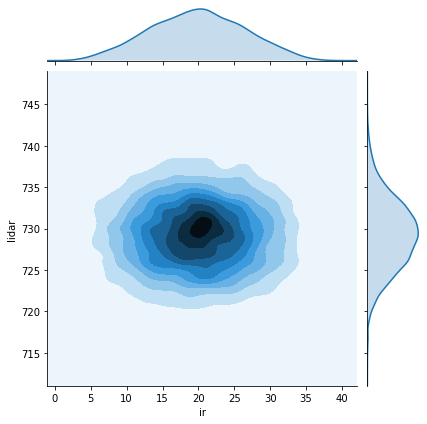

In [2]:
#2次元ガウス分布
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./sensor_data_700.txt",delimiter=" ", header=None, names = ["date","time","ir","lidar"])

d = data[ (data["time"]<160000) & (data["time"]>=120000) ]
d = d.loc[:, ["ir","lidar"]]

sns.jointplot(x=d["ir"],y=d["lidar"],data=d,kind="kde")

In [3]:
#光センサとlidarの測定値の共分散の計算_1
print("光センサの計測値の分散:", d.ir.var())
print("LIDARの計測値の分散:", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()
a = diff_ir*diff_lidar
print("共分散:", sum(a)/len(d))

d.mean()

光センサの計測値の分散: 42.117126367701594
LIDARの計測値の分散: 17.702026469211457
共分散: -0.31675568619766026


ir        19.860247
lidar    729.311958
dtype: float64

In [4]:
#光センサとlidarの測定値の共分散の計算_2
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


<a list of 6 text.Text objects>

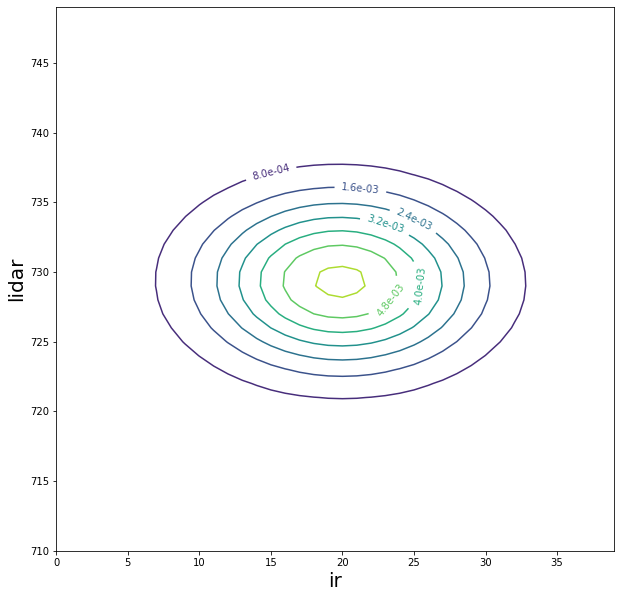

In [22]:
from scipy.stats import multivariate_normal
irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values) #平均値と共分散が既知の、多次元の正規分布に従う、乱数を生成し、irlidarに代入している。


fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(111,projection="3d")

ax.set_xlabel("ir", size = 20)
ax.set_ylabel("lidar", size = 20)
#ax.set_zlabel("probability", size = 20)

x,y = np.mgrid[0:40,710:750]
pos = np.zeros(x.shape + (2,))
pos[:,:,0] = x
pos[:,:,1] = y
cont = ax.contour(x,y,irlidar.pdf(pos))
cont.clabel(fmt='%1.1e')

In [13]:
print("X座標: ", x)
print("Y座標: ", y)

X座標:  [[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [37 37 37 ... 37 37 37]
 [38 38 38 ... 38 38 38]
 [39 39 39 ... 39 39 39]]
Y座標:  [[710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 ...
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]]


<a list of 5 text.Text objects>

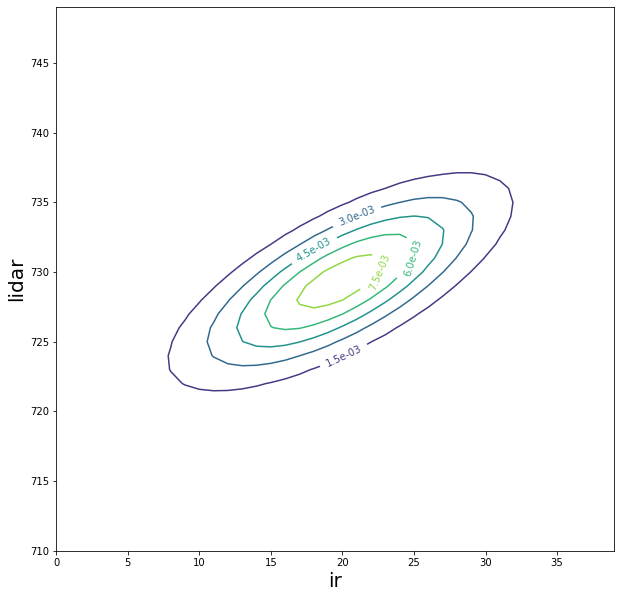

In [31]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.set_xlabel("ir", size = 20)
ax.set_ylabel("lidar", size = 20)

c = d.cov().values + np.array([[0,20],[20,0]])

tmp =  multivariate_normal(mean=d.mean().values.T, cov=c)
cont = ax.contour(x, y, tmp.pdf(pos))
cont.clabel(fmt='%1.1e')